In [1]:
# Installing dependencies


%pip install scikit-learn
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install nltk
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------------------------- ---------- 30.7/42.0 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 675.1 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.5 MB 6.8 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.5 MB 3.4 MB/s eta 0:00:01
   -------- ------------------------------- 0.3/1.5 MB 2.9 MB/s eta 0:00:01
   --------- ------------------------------ 0.4/1.5 MB 2.1 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.5 MB 1.9 MB/s eta 0:00:01
   ------------ -----------------

In [2]:
import nltk
import pandas as pd
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer


In [3]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [4]:
df = pd.read_csv('dataset/merged_data_4000.csv')

In [5]:
df

,tweets,cyberbyllying_type
0,Here at home. Neighbors pick on my family and ...,age
1,Being bullied at school: High-achieving boys u...,age
2,There was a girl in my class in 6th grade who ...,age
3,He’s probably a white gay kid from some suburb...,age
4,You are pushed ti resorting. Treating thr bull...,age
...,...,...
23995,You’ll support a person who can’t remember in ...,religion
23996,RT @jeanniology: Obama implies murder of 3 Mus...,religion
23997,@ummayman90 #Islam is about forcing people to ...,religion
23998,As a Christian woman no one has the right to t...,religion


In [6]:
df.isnull().sum()

tweets                1
cyberbyllying_type    0
dtype: int64

In [7]:
df = df.dropna(axis=0)

In [8]:
df.isnull().sum()

tweets                0
cyberbyllying_type    0
dtype: int64

In [9]:
df

,tweets,cyberbyllying_type
0,Here at home. Neighbors pick on my family and ...,age
1,Being bullied at school: High-achieving boys u...,age
2,There was a girl in my class in 6th grade who ...,age
3,He’s probably a white gay kid from some suburb...,age
4,You are pushed ti resorting. Treating thr bull...,age
...,...,...
23995,You’ll support a person who can’t remember in ...,religion
23996,RT @jeanniology: Obama implies murder of 3 Mus...,religion
23997,@ummayman90 #Islam is about forcing people to ...,religion
23998,As a Christian woman no one has the right to t...,religion


In [10]:
df['tweets'].nunique()

23584

In [11]:
df['cyberbyllying_type'].value_counts()


cyberbyllying_type
age                  4000
ethnicity            4000
gender               4000
not_cyberbullying    4000
religion             4000
other                3999
Name: count, dtype: int64

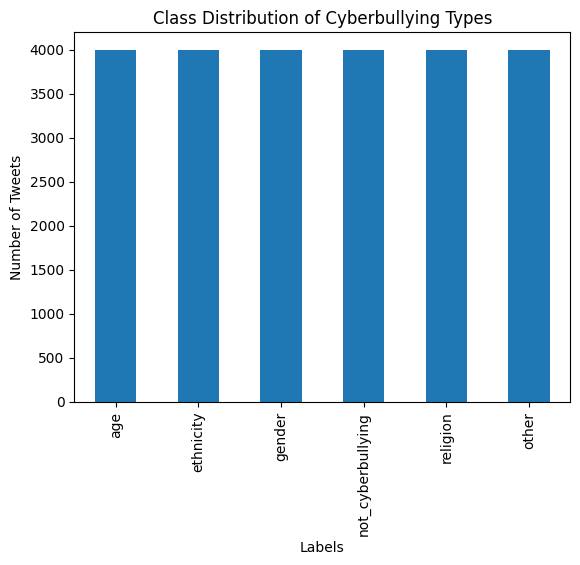

In [12]:
# Create a bar plot of the class distribution
class_counts = df['cyberbyllying_type'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Cyberbullying Types')
plt.xlabel('Labels')
plt.ylabel('Number of Tweets')
plt.show()



In [185]:
# Concatenate all tweet texts into a single string
all_text = ' '.join(df['tweets'].values)
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)
# Split the text into individual words
words = all_text.split()

In [186]:
# remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [187]:
# Count the frequency of each word
word_counts = Counter(words)
top_words = word_counts.most_common(20)
top_words

[('I', 7996),
 ('school', 3367),
 ('like', 2655),
 ('high', 2353),
 ('dumb', 2215),
 ('bullied', 2168),
 ('RT', 2088),
 ('people', 1812),
 ('u', 1682),
 ('rape', 1529),
 ('fuck', 1491),
 ('one', 1375),
 ('bully', 1347),
 ('&amp;', 1328),
 ('gay', 1322),
 ('ass', 1266),
 ('The', 1254),
 ('get', 1208),
 ('girls', 1197),
 ('You', 1195)]

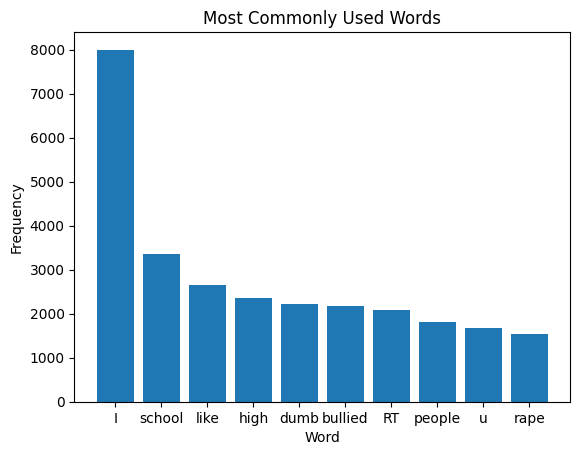

In [188]:


# Create a bar chart of the most common words
top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()



In [13]:
# Clean the data
def clean_text(y):
    # Remove HTML tags
    x = re.sub(r'@\S+','',y)
    x_ = re.sub(r'http\S+','',x)
    x__ = re.sub(r'#\S+','',x_)
    text = re.sub('<.*?>', '', x__)
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    words = nltk.word_tokenize(text)
    
    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    
    # Join the words back into a string
    text = ' '.join(words)
    return text

In [14]:
from tqdm import tqdm

In [15]:
df['cleaned_feature'] = [clean_text(text) for text in tqdm(df['tweets'])]


100%|██████████| 23999/23999 [00:53<00:00, 448.34it/s]
C:\Users\User\AppData\Local\Temp\ipykernel_3572\1019417207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_feature'] = [clean_text(text) for text in tqdm(df['tweets'])]


In [16]:
df["cyberbyllying_type"]

0             age
1             age
2             age
3             age
4             age
           ...   
23995    religion
23996    religion
23997    religion
23998    religion
23999    religion
Name: cyberbyllying_type, Length: 23999, dtype: object

In [162]:
cleaned_text = df[["cleaned_feature", "cyberbyllying_type"]]
cleaned_text.to_csv('ethnicity_cleaned.csv', index=False, encoding='utf-8')

In [17]:
# Create the Bag of Words model
cv = CountVectorizer()
X = cv.fit_transform(df['cleaned_feature']).toarray()
y = df['cyberbyllying_type']

In [18]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# train a Logistic Regression Model
clf = LogisticRegression(max_iter = 1000)

In [38]:


clf.fit(X_train, y_train)



LogisticRegression(max_iter=100000)

In [201]:
print(X_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [39]:
y_pred = clf.predict(X_test)
y_pred

array(['age', 'other', 'not_cyberbullying', ..., 'age', 'age',
       'not_cyberbullying'], dtype=object)

In [33]:
def convertSentence(sentence):
    sentence = clean_text(sentence)
    sentence = cv.transform([sentence]).toarray()
    return sentence

def predictSentence(sentence):
    x = convertSentence(sentence)
    y = clf.predict(x)
    return y[0]

predictSentence("")

'other'

In [40]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8054166666666667


In [50]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

                   precision    recall  f1-score   support

              age       0.96      0.97      0.97       812
        ethnicity       0.99      0.97      0.98       783
           gender       0.89      0.81      0.85       796
not_cyberbullying       0.53      0.50      0.52       819
            other       0.54      0.65      0.59       788
         religion       0.98      0.94      0.96       802

         accuracy                           0.81      4800
        macro avg       0.81      0.81      0.81      4800
     weighted avg       0.81      0.81      0.81      4800



In [51]:
#Importing all the terms by which we get accuracy of our model
#NOTE:we haven't trained our model yet 
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
#creates a confusion matrix
from sklearn.metrics import confusion_matrix
data =[] #Empty list created to add the accuracy terms of each model that we are going to train 
from sklearn.naive_bayes import MultinomialNB

In [55]:
#Same we do for Navie Bayes model and store the accuracy terms in 'data' list
NBpred = MultinomialNB(alpha = 0.1, fit_prior = True)
NBpred.fit(X_train, y_train)


MultinomialNB(alpha=0.1)

In [56]:
NBpred_test = NBpred.predict(X_test)
predictions_train = NBpred.predict(X_train)

In [57]:
from sklearn.metrics import classification_report
report = classification_report(y_test, NBpred_test)
print(report)

                   precision    recall  f1-score   support

              age       0.81      0.96      0.88       812
        ethnicity       0.78      0.92      0.85       783
           gender       0.84      0.77      0.80       796
not_cyberbullying       0.59      0.39      0.47       819
            other       0.55      0.51      0.53       788
         religion       0.85      0.96      0.90       802

         accuracy                           0.75      4800
        macro avg       0.74      0.75      0.74      4800
     weighted avg       0.74      0.75      0.74      4800

